In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [5]:
for cal in cat_cols:
    print(df[cal].value_counts())
    print('-------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019

# Cleaning

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

220

In [9]:
df = df.drop_duplicates()

In [10]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [11]:
# Convert Date of journey to datetime instead of object
df['Date_of_Journey']  = pd.to_datetime(df['Date_of_Journey'],format = "%d/%m/%Y")
df ['Month'] = df['Date_of_Journey'].dt.month
df ['Dep_Time_day'] = df['Date_of_Journey'].dt.day




In [12]:
#convert Duration column to int
def transform(x):
    y = x.split(' ')
    if len(y)==1:
        l = y[0][:-1]
        return int(l)*60
    elif len(y)==2:
        l = y[0][:-1]
        r = y[1][:-1]
        return int(l)*60+int(r)
        
df['Duration_in_minutes'] = df['Duration'].apply(transform)   

In [13]:
df.drop(columns='Duration' , inplace = True)

In [14]:
# convert Total_stops to int  
stops = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(stops)

#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10462 non-null  object        
 1   Date_of_Journey      10462 non-null  datetime64[ns]
 2   Source               10462 non-null  object        
 3   Destination          10462 non-null  object        
 4   Route                10462 non-null  object        
 5   Dep_Time             10462 non-null  object        
 6   Arrival_Time         10462 non-null  object        
 7   Total_Stops          10462 non-null  int64         
 8   Additional_Info      10462 non-null  object        
 9   Price                10462 non-null  int64         
 10  Month                10462 non-null  int64         
 11  Dep_Time_day         10462 non-null  int64         
 12  Duration_in_minutes  10462 non-null  int64         
dtypes: datetime64[ns](1), int64(5),

In [15]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [16]:
#to merge "No Info"
def info(z):
    if z =='No Info':
        return 'No info'
    else:
        return z 
df['Additional_Info'] = df['Additional_Info'].apply(info)

#test
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Time_hour']=df['Dep_Time'].dt.hour
df['Dep_Time_minute']=df['Dep_Time'].dt.minute

In [18]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Time_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Time_minute'] = df['Arrival_Time'].dt.minute
df['Arrival_Time_day'] = df['Arrival_Time'].dt.day
def time(t):
    if t['Arrival_Time_day'] == 19:
        return t['Dep_Time_day']
    else:
        return t['Arrival_Time_day']
    
df['Arrival_Time_day'] = df.apply(time,axis = 1)

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-20 22:20:00,2023-03-22 01:10:00,0,No info,3897,3,24,170,22,20,1,10,22
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-20 05:50:00,2023-06-20 13:15:00,2,No info,7662,5,1,445,5,50,13,15,20
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-20 09:25:00,2023-06-10 04:25:00,2,No info,13882,6,9,1140,9,25,4,25,10
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-06-20 18:05:00,2023-06-20 23:30:00,1,No info,6218,5,12,325,18,5,23,30,20
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-06-20 16:50:00,2023-06-20 21:35:00,1,No info,13302,3,1,285,16,50,21,35,20


In [20]:
df = df.drop(columns=['Dep_Time','Arrival_Time','Date_of_Journey'])

In [21]:
#not logic
df.drop(df[df['Dep_Time_day'] > df['Arrival_Time_day']].index,inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8433 entries, 1 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              8433 non-null   object
 1   Source               8433 non-null   object
 2   Destination          8433 non-null   object
 3   Route                8433 non-null   object
 4   Total_Stops          8433 non-null   int64 
 5   Additional_Info      8433 non-null   object
 6   Price                8433 non-null   int64 
 7   Month                8433 non-null   int64 
 8   Dep_Time_day         8433 non-null   int64 
 9   Duration_in_minutes  8433 non-null   int64 
 10  Dep_Time_hour        8433 non-null   int64 
 11  Dep_Time_minute      8433 non-null   int64 
 12  Arrival_Time_hour    8433 non-null   int64 
 13  Arrival_Time_minute  8433 non-null   int64 
 14  Arrival_Time_day     8433 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 1.0+ MB


In [23]:
df.describe()

,Total_Stops,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
count,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000
mean,0.859362,9455.739357,4.752401,10.959682,691.031661,12.989090,24.346022,12.761769,24.962054,17.159492
std,0.665211,4687.398163,1.153999,7.407576,522.309420,5.785695,18.778578,7.040446,16.264819,6.500625
min,0.000000,1759.000000,3.000000,1.000000,75.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,5678.000000,4.000000,6.000000,175.000000,8.000000,5.000000,7.000000,15.000000,13.000000
50%,1.000000,8937.000000,5.000000,9.000000,570.000000,13.000000,25.000000,12.000000,25.000000,20.000000
75%,1.000000,12723.000000,6.000000,15.000000,1045.000000,18.000000,40.000000,19.000000,35.000000,20.000000
max,4.000000,79512.000000,6.000000,27.000000,2860.000000,23.000000,55.000000,23.000000,55.000000,29.000000


In [24]:
(df.corr()['Price'])*100

Total_Stops             58.683062
Price                  100.000000
Month                  -15.428409
Dep_Time_day            -5.329618
Duration_in_minutes     47.575725
Dep_Time_hour           -2.002049
Dep_Time_minute         -1.113441
Arrival_Time_hour        4.971098
Arrival_Time_minute     -7.299921
Arrival_Time_day       -22.894650
Name: Price, dtype: float64

In [25]:
df.quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.97,0.98,0.99,1])

,Total_Stops,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
0.10,0.0,4049.0,3.0,1.0,150.0,6.0,0.0,2.0,0.0,7.0
0.25,0.0,5678.0,4.0,6.0,175.0,8.0,5.0,7.0,15.0,13.0
0.50,1.0,8937.0,5.0,9.0,570.0,13.0,25.0,12.0,25.0,20.0
0.75,1.0,12723.0,6.0,15.0,1045.0,18.0,40.0,19.0,35.0,20.0
0.90,2.0,14781.0,6.0,21.0,1500.0,21.0,50.0,21.0,50.0,22.0
0.95,2.0,16090.6,6.0,24.0,1625.0,22.0,55.0,22.0,50.0,25.0
0.97,2.0,17261.0,6.0,27.0,1695.0,22.0,55.0,23.0,55.0,28.0
0.98,2.0,19225.0,6.0,27.0,1760.0,22.0,55.0,23.0,55.0,28.0
0.99,2.0,23567.0,6.0,27.0,1935.2,23.0,55.0,23.0,55.0,28.0
1.00,4.0,79512.0,6.0,27.0,2860.0,23.0,55.0,23.0,55.0,29.0


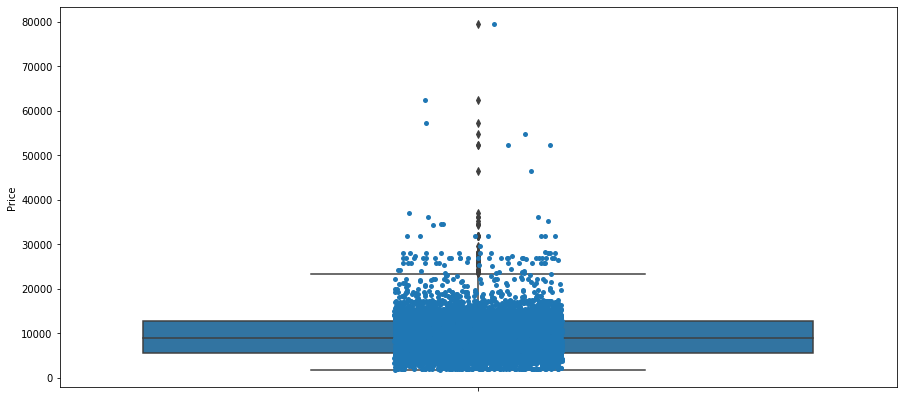

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(data =df , y  = 'Price')
sns.stripplot(data =df , y  = 'Price')
plt.show()

In [27]:
df[df['Price'] > 22000]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,22270,3,1,1265,8,0,5,5,2
123,Air India,Delhi,Cochin,DEL → BOM → COK,1,No info,27430,3,1,1215,23,0,19,15,2
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,36983,3,1,385,12,50,19,15,20
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,26890,3,1,380,8,55,15,15,20
510,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,26890,3,1,325,7,0,12,25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,2,No info,24210,3,6,1260,19,50,16,50,7
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1,Business class,57209,3,1,280,9,45,14,25,20
10383,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,26890,3,1,1325,7,0,5,5,2
10439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,31825,3,1,860,18,40,9,0,2


In [28]:
df.drop(df[df['Price'] > 22000].index,inplace=True)

In [29]:
df.quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.97,0.98,0.99,1])

,Total_Stops,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
0.10,0.0,4049.0,3.0,1.0,150.0,6.0,0.0,2.0,0.0,7.0
0.25,0.0,5646.0,4.0,6.0,175.0,8.0,5.0,7.0,15.0,13.0
0.50,1.0,8849.0,5.0,9.0,570.0,13.0,25.0,12.0,25.0,20.0
0.75,1.0,12646.0,6.0,15.0,1040.0,18.0,40.0,19.0,35.0,20.0
0.90,2.0,14714.0,6.0,21.0,1504.0,21.0,50.0,21.8,50.0,22.0
0.95,2.0,15554.0,6.0,24.0,1625.0,22.0,55.0,22.0,50.0,25.0
0.97,2.0,16704.0,6.0,27.0,1695.0,22.0,55.0,23.0,55.0,28.0
0.98,2.0,17231.8,6.0,27.0,1760.0,22.0,55.0,23.0,55.0,28.0
0.99,2.0,18485.0,6.0,27.0,1936.7,23.0,55.0,23.0,55.0,28.0
1.00,4.0,21954.0,6.0,27.0,2860.0,23.0,55.0,23.0,55.0,29.0


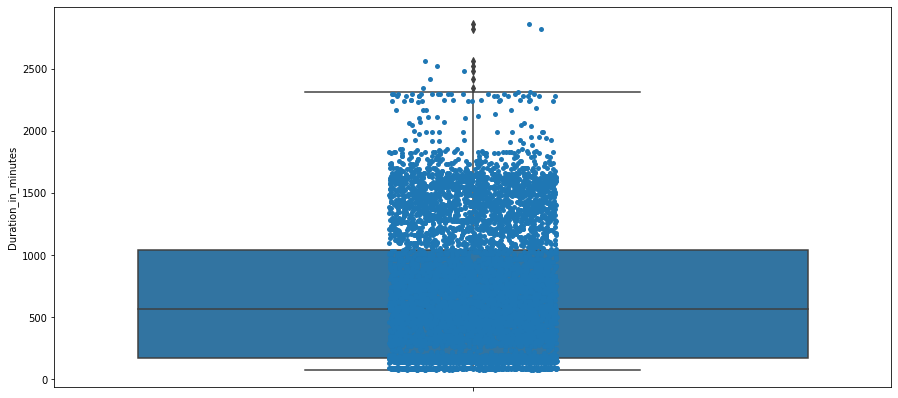

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(data =df , y  = 'Duration_in_minutes')
sns.stripplot(data =df , y  = 'Duration_in_minutes')
plt.show()

In [31]:
df[df['Duration_in_minutes']>2000]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
226,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2,No info,18799,3,3,2245,5,25,18,50,4
470,Jet Airways,Delhi,Cochin,DEL → UDR → BOM → COK,2,No info,13082,3,21,2045,18,20,4,25,23
553,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2,No info,10598,3,9,2295,5,0,19,15,10
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,3,No info,10991,5,12,2115,12,0,23,15,13
925,Jet Airways,Delhi,Cochin,DEL → DED → BOM → COK,2,No info,19907,3,6,2135,16,50,4,25,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,Air India,Delhi,Cochin,DEL → BHO → BOM → COK,2,No info,13748,3,3,2240,5,55,19,15,4
10020,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2,No info,9653,5,9,2295,5,0,19,15,10
10326,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,2,No info,11791,3,3,2420,5,50,22,10,7
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2,No info,20694,3,6,2860,19,10,18,50,8


In [32]:
df.drop(df[df['Duration_in_minutes']>2000].index,inplace=True)

In [33]:
df.quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.97,0.98,0.99,1])

,Total_Stops,Price,Month,Dep_Time_day,Duration_in_minutes,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day
0.10,0.0,4049.0,3.0,1.0,150.00,6.0,0.0,2.0,0.0,7.0
0.25,0.0,5626.0,4.0,6.0,175.00,8.0,5.0,7.0,15.0,13.0
0.50,1.0,8759.0,5.0,9.0,570.00,13.0,25.0,12.0,25.0,20.0
0.75,1.0,12615.0,6.0,15.0,1017.50,18.0,40.0,19.0,35.0,20.0
0.90,2.0,14714.0,6.0,21.0,1485.00,21.0,50.0,21.0,50.0,22.0
0.95,2.0,15532.0,6.0,24.0,1612.25,22.0,55.0,22.0,50.0,25.0
0.97,2.0,16704.0,6.0,27.0,1655.00,22.0,55.0,23.0,55.0,28.0
0.98,2.0,17057.0,6.0,27.0,1700.00,22.0,55.0,23.0,55.0,28.0
0.99,2.0,18308.0,6.0,27.0,1784.90,23.0,55.0,23.0,55.0,28.0
1.00,4.0,21954.0,6.0,27.0,2000.00,23.0,55.0,23.0,55.0,29.0


In [34]:
df.to_csv('Clean_data.csv')

# Preprocessing

In [35]:
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

cate_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols.remove('Price')

Preprocessor = ColumnTransformer([('Categorical' , BinaryEncoder(),cate_cols), ('Numerical',MinMaxScaler(),num_cols)])

# Split data

In [36]:
from sklearn.model_selection import train_test_split
x = df.drop(columns= 'Price')
y = df['Price']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42) 

In [37]:
x_train_preprocessed = Preprocessor.fit_transform(x_train)
x_test_preprocessed = Preprocessor.transform(x_test)

# Modeling

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(x_train_preprocessed,y_train)

#Evaluate
y_pred = lr.predict(x_test_preprocessed)

from sklearn.metrics import r2_score,mean_squared_error

print('R2 Score: ',r2_score(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.6563330997065551
RMSE:  2418.8427575329015


In [39]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_preprocessed,y_train) 

y_pred = ridge.predict(x_test_preprocessed)

#Evaluate
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.6875470771760844
RMSE: 2306.3811497337706


In [40]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_preprocessed,y_train) 

y_pred = lasso.predict(x_test_preprocessed)

#Evaluate
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.6877321295521934
RMSE: 2305.6980635894142


In [41]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = make_pipeline(PolynomialFeatures(4),Ridge())
poly.fit(x_train_preprocessed,y_train) 

y_pred = poly.predict(x_test_preprocessed)

#Evaluate
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.9096552421504107
RMSE: 1240.1958197323488


In [42]:
# log transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [43]:
#Linear Regression with y log
lr.fit(x_train_preprocessed,y_train_log)

#Evaluate
y_pred = lr.predict(x_test_preprocessed)

from sklearn.metrics import r2_score,mean_squared_error

print('R2 Score: ',r2_score(y_test_log,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test_log,y_pred)))

R2 Score:  0.7148642510660532
RMSE:  0.2668164277955672


In [44]:
# Ridge Regression with y log

ridge.fit(x_train_preprocessed,y_train_log) 

y_pred = ridge.predict(x_test_preprocessed)

#Evaluate
print('R2 Score:',r2_score(y_test_log,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test_log,y_pred)))

R2 Score: 0.7387905640978296
RMSE: 0.2553766354193356


In [45]:
#Polynomial Regression with y log

poly = make_pipeline(PolynomialFeatures(4),Ridge())
poly.fit(x_train_preprocessed,y_train_log) 

y_pred = poly.predict(x_test_preprocessed)

#Evaluate
print('R2 Score:',r2_score(y_test_log,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test_log,y_pred)))

R2 Score: 0.9289618215100881
RMSE: 0.13317804603946531


# Saving

In [46]:
import pickle
pickle.dump(Preprocessor,open('Preprocessor.pkl','wb'))
pickle.dump(poly,open('model.pkl','wb'))

# Streamlit

In [47]:
%%writefile Air_flight_app.py

import pandas as pd
import numpy as np
import streamlit as st
import sklearn


st.markdown("<h1 style='text-align: center; color: grey;'>Air Flights Tickets Price Prediction</h1>", unsafe_allow_html=True)
st.title(' ')

col3,col4,col5 = st.columns(3)
with col3:
    st.write(' ')
with col4:
    st.image('air.png',width = 550) 
with col5:
    st.write(' ')

#st.image('air.png',width = 500)


#load data
df = pd.read_csv('Clean_data.csv')
Preprocessor = pd.read_pickle('Preprocessor.pkl')
model = pd.read_pickle('model.pkl')

#App
col1 , col2 = st.columns(2)

with col1:
    airline = st.selectbox('Airline',df['Airline'].unique())
    Source = st.selectbox('Source',df['Source'].unique())
    Destination = st.selectbox('Destination',df['Destination'].unique())
    Route = st.selectbox('Route',df['Route'].unique())
    Add = st.selectbox('Additional Info',df['Additional_Info'].unique())
    Total_Stops = st.number_input('Total Stops',df['Total_Stops'].min(),df['Total_Stops'].max())
    Duration_in_minutes = st.number_input('Duration in minutes',df['Duration_in_minutes'].min() ,df['Duration_in_minutes'].max() )

with col2:
    Month = st.number_input('Departure Month',df['Month'].min() ,df['Month'].max() )
    Dep_Time_day = st.number_input('Departure Day',df['Dep_Time_day'].min() ,df['Dep_Time_day'].max() )
    Dep_Time_hour = st.number_input('Departure Hour',df['Dep_Time_hour'].min() ,df['Dep_Time_hour'].max() )
    Dep_Time_minute = st.number_input('Departure Minute',df['Dep_Time_minute'].min() ,df['Dep_Time_minute'].max() )
    Arrival_Time_day = st.number_input('Arrival Day',df['Arrival_Time_day'].min() ,df['Arrival_Time_day'].max() )
    Arrival_Time_hour = st.number_input('Arrival Hour',df['Arrival_Time_hour'].min() ,df['Arrival_Time_hour'].max() )
    Arrival_Time_minute = st.number_input('Arrival Minute',df['Arrival_Time_minute'].min() ,df['Arrival_Time_minute'].max())

# Preprocessor
new_data = {'Airline':airline,'Source':Source,'Destination':Destination,'Route':Route,
            'Additional_Info':Add,'Total_Stops':Total_Stops,'Duration_in_minutes':Duration_in_minutes,'Month':Month,
            'Dep_Time_day':Dep_Time_day,'Dep_Time_hour':Dep_Time_hour,'Dep_Time_minute':Dep_Time_minute
            ,'Arrival_Time_day':Arrival_Time_day,'Arrival_Time_hour':Arrival_Time_hour,'Arrival_Time_minute':Arrival_Time_minute}


new_data = pd.DataFrame(new_data,index=[0])
new_data_Preprocessed = Preprocessor.transform(new_data)

log_price = model.predict(new_data_Preprocessed)
price = np.expm1(log_price)

# Output
if st.button('Predict'):
    st.markdown('## Price:')
    st.markdown(price.round(2))

Overwriting Air_flight_app.py


In [ ]:
!streamlit run Air_flight_app.py